<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
from prophet import Prophet
!pip install prophet


In [121]:
df = pd.read_csv("/content/dataset.csv")
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [122]:
df.columns

Index(['Time Date', 'Product', 'Store', 'Value'], dtype='object')

In [123]:
df["Product"].nunique()

1

In [106]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:

#df["Time Date"] = pd.to_datetime(df['Time Date'])


In [124]:
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [125]:
df["Year"] = df["Time Date"].apply(lambda x: str(x)[-4:])
df["Month"] = df["Time Date"].apply(lambda x: str(x)[-6 :-4])
df["Day"] = df["Time Date"].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex( df["Year"] +  "-"+ df["Month"] + "-" +df["Day"])

In [126]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [127]:
df.columns

Index(['Time Date', 'Product', 'Store', 'Value', 'Year', 'Month', 'Day', 'ds'], dtype='object')

In [128]:
df2=df[[ 'ds' ,#'Time Date', 'Product', 'Store',
       'Value', #'Year', 'Month', 'Day', ,
       ]].copy()

In [138]:
df2.columns =["ds" , "y"]
df2

,ds,y
0,2018-01-01,2926.000000
1,2018-01-02,2687.531000
2,2018-01-03,2793.000000
3,2018-01-04,2394.000000
4,2018-01-05,2660.000000
...,...,...
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329


In [136]:
m = Prophet(interval_width = 0.95 , daily_seasonality = True)

In [139]:
model= m.fit(df2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhqq1d34/yxhc5v1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxhqq1d34/e7b52jmf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52648', 'data', 'file=/tmp/tmpxhqq1d34/yxhc5v1d.json', 'init=/tmp/tmpxhqq1d34/e7b52jmf.json', 'output', 'file=/tmp/tmpxhqq1d34/prophet_modelpzqslxl0/prophet_model-20230815142419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [142]:
future = m.make_future_dataframe(periods = 365 , freq = "D")
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.561512,809.076629,3920.848790,3042.561512,3042.561512,-638.399466,-638.399466,-638.399466,471.949669,...,16.625235,16.625235,16.625235,-1126.974369,-1126.974369,-1126.974369,0.0,0.0,0.0,2404.162046
1,2018-01-02,3043.293094,869.267300,4003.178056,3043.293094,3043.293094,-648.583698,-648.583698,-648.583698,471.949669,...,-11.279246,-11.279246,-11.279246,-1109.254121,-1109.254121,-1109.254121,0.0,0.0,0.0,2394.709396
2,2018-01-03,3044.024676,867.652985,3955.017361,3044.024676,3044.024676,-622.804684,-622.804684,-622.804684,471.949669,...,-4.408750,-4.408750,-4.408750,-1090.345602,-1090.345602,-1090.345602,0.0,0.0,0.0,2421.219992
3,2018-01-04,3044.756258,905.394520,4100.826670,3044.756258,3044.756258,-575.884282,-575.884282,-575.884282,471.949669,...,22.490694,22.490694,22.490694,-1070.324645,-1070.324645,-1070.324645,0.0,0.0,0.0,2468.871975
4,2018-01-05,3045.487839,905.894243,4239.241881,3045.487839,3045.487839,-611.942497,-611.942497,-611.942497,471.949669,...,-34.572281,-34.572281,-34.572281,-1049.319885,-1049.319885,-1049.319885,0.0,0.0,0.0,2433.545342


In [150]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1440,2021-12-12,3572.753791,1986.219797,5114.745167
1441,2021-12-13,3588.823639,2009.616323,5227.674386
1442,2021-12-14,3584.750534,1853.492487,5112.260482
1443,2021-12-15,3614.406077,2061.127573,5198.535997
1444,2021-12-16,3662.863482,2022.082165,5282.694937


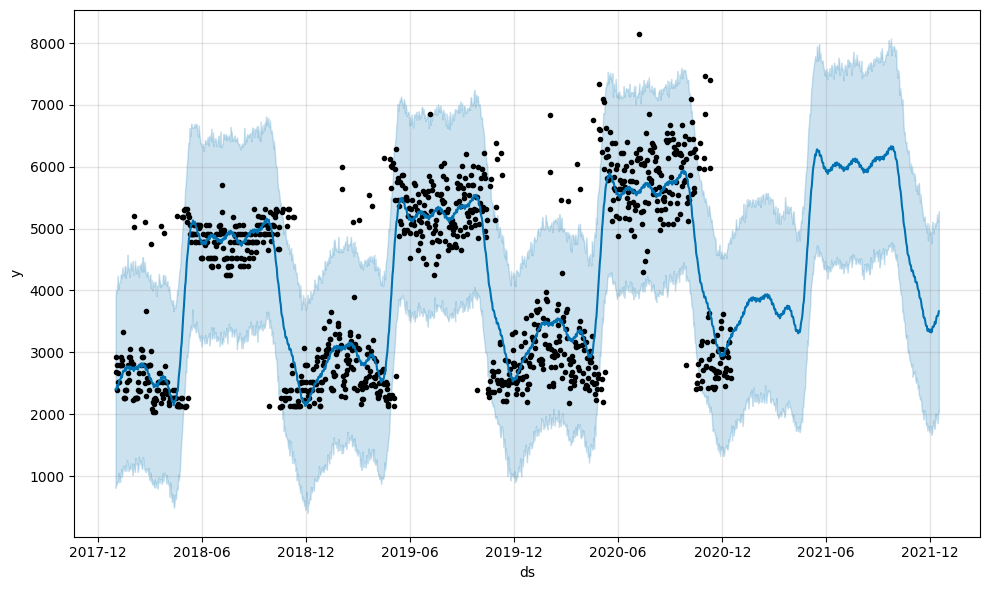

In [144]:
fig1 = m.plot(forecast)


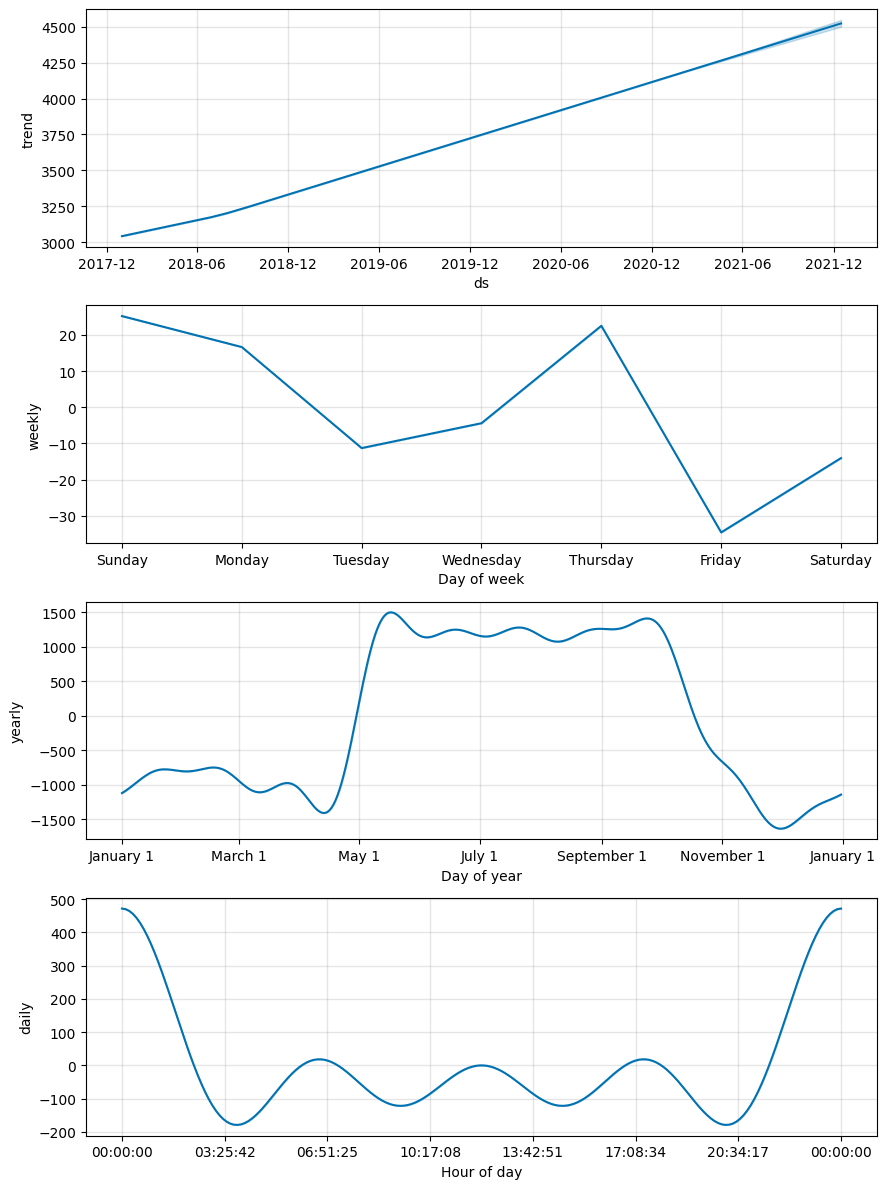

In [145]:
fig2 = m.plot_components(forecast)


In [147]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [148]:
plot_components_plotly(m, forecast)